Promedio 11.61 Inferior 11.54 
 Superior 11.67 
[{'[4, 5]': 12, '[6]': 36, '[1, 2, 3]': 52}, {'[1, 2, 3]': 66, '[6]': 26, '[4, 5]': 8}, {'[1, 2, 3]': 72, '[6]': 27, '[4, 5]': 1}, {'[1, 2, 3]': 71, '[6]': 23, '[4, 5]': 6}, {'[4, 5]': 5, '[1, 2, 3]': 69, '[6]': 26}, {'[1, 2, 3]': 62, '[6]': 32, '[4, 5]': 6}, {'[1, 2, 3]': 59, '[6]': 35, '[4, 5]': 6}, {'[1, 2, 3]': 59, '[6]': 31, '[4, 5]': 10}, {'[1, 2, 3]': 74, '[6]': 20, '[4, 5]': 6}, {'[4, 5]': 5, '[1, 2, 3]': 74, '[6]': 21}, {'[4, 5]': 8, '[6]': 26, '[1, 2, 3]': 66}, {'[1, 2, 3]': 64, '[6]': 34, '[4, 5]': 2}, {'[1, 2, 3]': 68, '[6]': 25, '[4, 5]': 7}, {'[4, 5]': 9, '[1, 2, 3]': 60, '[6]': 31}, {'[4, 5]': 5, '[1, 2, 3]': 62, '[6]': 33}, {'[4, 5]': 7, '[1, 2, 3]': 66, '[6]': 27}, {'[1, 2, 3]': 61, '[6]': 30, '[4, 5]': 9}, {'[4, 5]': 6, '[1, 2, 3]': 65, '[6]': 29}, {'[1, 2, 3]': 63, '[6]': 27, '[4, 5]': 10}, {'[1, 2, 3]': 55, '[6]': 38, '[4, 5]': 7}, {'[4, 5]': 5, '[1, 2, 3]': 58, '[6]': 37}, {'[4, 5]': 5, '[1, 2, 3]': 70, '[6]': 25}, {'

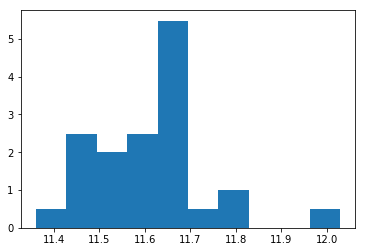

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from criticalpath import Node
import math
%matplotlib inline

CANT_MUESTRAS = 30 # cantidad total de muestras a obtener
TAM_MUESTRA = 100 # tamaño de cada muestra.
VALOR_Z = 2.57

ROMPER_HUEVOS = {
    'id':1,
    'nombre':'Romper Huevos',
    'low':2,
    'high': 4,
    'tiempos':[],
    'predecesoras': []
}
REVOLVER_HUEVOS = {
    'id':2,
    'nombre':'Revolver Huevos',
    'low':3,
    'high': 6,
    'tiempos':[],
    'predecesoras': [1]
}
COCINAR_HUEVOS = {
    'id':3,
    'nombre':'Cocinar Huevos',
    'low':2,
    'high': 5,
    'tiempos':[],
    'predecesoras': [2]
}
HACER_TOSTADAS = {
    'id':4,
    'nombre':'Hacer Tostadas',
    'low':3,
    'high': 6,
    'tiempos':[],
    'predecesoras': []
}
TOSTADAS_MANTEQUILLA = {
    'id':5,
    'nombre':'Tostadas con Mantequilla',
    'low':2,
    'high': 6,
    'tiempos':[],
    'predecesoras': [4]
}

FREIR_TOCINO = {
    'id':6,
    'nombre':'Freir Tocino',
    'low':4,
    'high': 14,
    'tiempos':[],
    'predecesoras': []
}
GET_NOMBRE_TAREA = {
    1:ROMPER_HUEVOS['nombre'],
    2:REVOLVER_HUEVOS['nombre'],
    3:COCINAR_HUEVOS['nombre'],
    4:HACER_TOSTADAS['nombre'],
    5:TOSTADAS_MANTEQUILLA['nombre'],
    6:FREIR_TOCINO['nombre']
}

TAREAS = [
    ROMPER_HUEVOS, REVOLVER_HUEVOS, COCINAR_HUEVOS, HACER_TOSTADAS, TOSTADAS_MANTEQUILLA, FREIR_TOCINO
]

# Cada tarea tiene lista de timpos. tiempo.length == corridas que siguen distribucion uniform
def generarTiempos(tareas, corridas):
    for tarea in tareas:
        tarea['tiempos'] = np.random.uniform(tarea['low'], tarea['high'], corridas) # [ini, fin)
        
# obtenemos ruta critica del proyecto con los tiempos previamente generados.

def getNodo(nodos, id_tarea):
    nodo = None
    for i in range(len(nodos)):
        if int(str(nodos[i])) == id_tarea:
            nodo = nodos[i]
            break
    return nodo       
    
def getDuracionRutaCritica(tareas, indice_tiempo):
    p = Node('project')
    criticidad = {}
    nodos = []
    #creamos los nodos = Tareas
    for tarea in tareas:
        nodo = p.add(Node(tarea['id'], duration = tarea['tiempos'][indice_tiempo]))    
        nodos.append(nodo)
    #creamos los links = predecesoras
    for tarea in tareas:
        nodo_tarea = getNodo(nodos, tarea['id'])
        for id_predecesora in tarea['predecesoras']:
            nodo_tarea_predecesora = getNodo(nodos, id_predecesora)
            p.link(nodo_tarea_predecesora, nodo_tarea)
    p.update_all()
    path = str(p.get_critical_path())
    result = {'duration':p.duration, 'tarea_critica': path}
    return result

def getMuestraProyecto(tareas, tam_muestra):
    muestra_tiempos = []
    criticidad = {}
    for i in range(tam_muestra):
        tiempo_y_ruta_critica = getDuracionRutaCritica(tareas, i)
        if tiempo_y_ruta_critica['tarea_critica'] in criticidad:
            criticidad[tiempo_y_ruta_critica['tarea_critica']] += 1
        else:
            criticidad[tiempo_y_ruta_critica['tarea_critica']] = 1
        tiempo_un_proyecto = tiempo_y_ruta_critica['duration']
        muestra_tiempos.append(tiempo_un_proyecto)
    #print "Muestreo de tiempos %s" % muestra_tiempos
    #print "CRITICIDAD %s"%(criticidad) 
    result = {'muestra_tiempos':muestra_tiempos, 'criticidad':criticidad}
    return result

def getMuestras(tareas, cant_muestras, tam_muestra):
    muestras = []
    criticidad = []
    for i in range(cant_muestras):
        generarTiempos(TAREAS, TAM_MUESTRA)
        muestra_y_criticidad = getMuestraProyecto(tareas, tam_muestra)
        criticidad.append(muestra_y_criticidad['criticidad'])
        muestras.append(muestra_y_criticidad['muestra_tiempos'])
    result = {'muestras':muestras, 'criticidad':criticidad}
    return result

def graficar(arreglo_muestras):    
    plt.hist(arreglo_muestras, 10, normed=True)
    
def getPromediosMuestras(muestras):
    promedios = []
    return map(lambda muestra: np.average(muestra), muestras)
        
def getPromedioProyecto(promedios, valor_z):
    desvio = np.std(promedios)
    promedio = np.average(promedios)
    inferior = promedio - (desvio * valor_z / math.sqrt(len(promedios)))
    superior = promedio + (desvio * valor_z / math.sqrt(len(promedios)))
    print "Promedio %.2f Inferior %.2f \n Superior %.2f " % (promedio,inferior, superior)
    return promedio

def getPromedioCriticidad(arreglo_criticidad):
    return 1
    
if __name__ == '__main__':
    #generarTiempos(TAREAS, TAM_MUESTRA)
    muestras_y_criticidad = getMuestras(TAREAS, CANT_MUESTRAS, TAM_MUESTRA) #muestras = [[muestra_1], [muestra_2]...[muestra_N]]
    promedios = getPromediosMuestras(muestras_y_criticidad['muestras'])
    promedio_total = getPromedioProyecto(promedios, VALOR_Z)
    dict_criticidad = getPromedioCriticidad(muestras_y_criticidad['criticidad'])
   # print "Muestras %s \n Promedios %s \n Promedio Total %.2f" % (muestras, promedios, promedio_total)
    
    graficar(promedios) 

#plt.show()
